<Axes: >

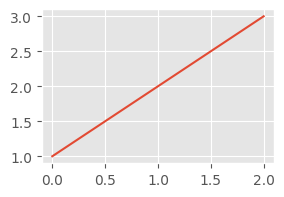

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.Series([1,2,3]).plot(figsize=(3,2))


# 데이터 불러오기

In [3]:
# df = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/main/advertising.csv')
df = pd.read_csv('data/advertising.csv')

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## 변수 선택
* 3가지 독립변수 모두 선택

In [4]:
# -----------------------------------
# 독립변수, 종속변수 선택
# -----------------------------------
X = df[['TV','Radio','Newspaper']]
y = df['Sales']

## 훈련세트 테스트세트 분할

In [5]:
# ------------------------------------------
# 훈련세트, 테스트세트 분할
# ------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 3) (50, 3) (150,) (50,)


## 파이프라인 구성 
* 데이터 처리 과정을 순차적으로 연결하여 자동화하는 도구

In [6]:
# --------------------------------------------
# 파이프라인 정의
# --------------------------------------------
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    Ridge(alpha=10)
)


## 훈련

In [7]:
# --------------------------------------------
# 훈련
# --------------------------------------------
pipeline.fit(X_train, y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=10))])

## 모델 평가

In [8]:

# --------------------------------------------
# 예측
# --------------------------------------------
pred = pipeline.predict(X_test)

# --------------------------------------------
# 모델 성능 평가
# --------------------------------------------
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error, mean_squared_error
r2 = r2_score(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)

print(f'r2:{r2}')
print(f'rmse:{rmse}')
print(f'mae:{mae}')
print(f'mse:{mse}')

# --------------------------------------------
# 과적합 확인
# --------------------------------------------
print('train>>>>>>>>>>>>', pipeline.score(X_train, y_train))
print('test>>>>>>>>>>>>>', pipeline.score(X_test, y_test))

r2:0.9227343615616703
rmse:1.4492852542293988
mae:1.0721058596262554
mse:2.1004277481267732
train>>>>>>>>>>>> 0.9025222263290175
test>>>>>>>>>>>>> 0.9227343615616703


## 파이프라인 저장 및 활용

In [9]:
import joblib
joblib.dump(pipeline, 'model/ad_ridge_pipeline.pkl')

['model/ad_ridge_pipeline.pkl']

In [ ]:
# ---------------------
# 파이프라인 불러오기
# ---------------------
loaded_pipe = joblib.load('model/ad_ridge_pipeline.pkl')

# ------------------------------------
# 예측
# ------------------------------------
new_data = [[175,15,2]]
loaded_pipe.predict(new_data)

c:\Users\chopi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([15.39046241])